In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image

In [2]:
class BatsmanState(TypedDict):
    '''
    Represents the state of a batsman in a cricket match.
    
    '''

    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float
    summary: str

In [ ]:
def calculate_sr(state: BatsmanState) -> dict :

    sr = (state['runs']/state['balls'])*100
    
    return {'sr': sr}

In [ ]:
def calculate_bpb(state: BatsmanState) -> dict :

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': bpb}

In [ ]:
def calculate_boundary_percent(state: BatsmanState) -> dict :

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [ ]:
def summary_batsman(state: BatsmanState) -> dict :

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    
    return {'summary': summary}

In [7]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary_batsman', summary_batsman)

# edges

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary_batsman')
graph.add_edge('calculate_bpb', 'summary_batsman')
graph.add_edge('calculate_boundary_percent', 'summary_batsman')

graph.add_edge('summary_batsman', END)

workflow = graph.compile()


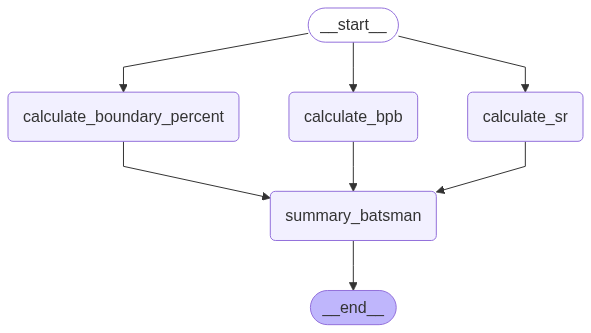

In [19]:
workflow

In [18]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}